In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [15]:
df = pd.read_csv('credit-g.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [16]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [18]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [19]:
categorical = ['checking_status','credit_history', 'purpose','savings_status', 'employment','personal_status', 'other_parties','property_magnitude', 'other_payment_plans','housing', 'job', 'own_telephone','foreign_worker']
encoder = LabelEncoder()
for x in categorical:
    df[x] = encoder.fit_transform(df[x])
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,7,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,7,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,4,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,5,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,1,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


In [20]:
X = df.drop('class',axis=1)
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=1)

['good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good'

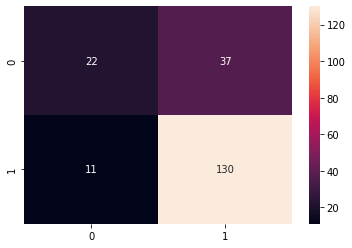

In [21]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))

['good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'goo

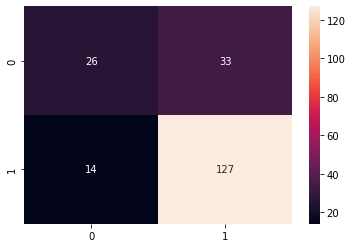

In [22]:
model1 = GradientBoostingClassifier()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))

['good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' '

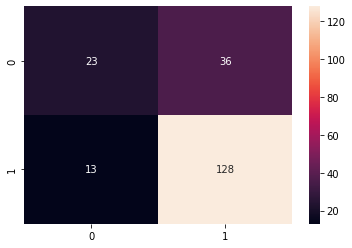

In [23]:
model1 = ExtraTreesClassifier()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))

['good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'

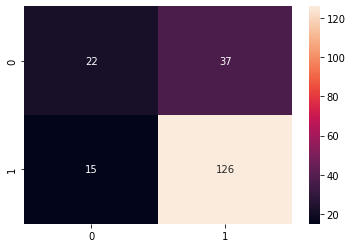

In [28]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver = 'newton-cg')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))

['bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good'

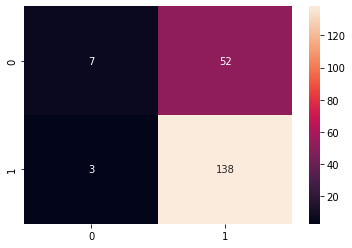

In [29]:
from sklearn.naive_bayes import BernoulliNB
model1 = BernoulliNB()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))

['bad' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good'

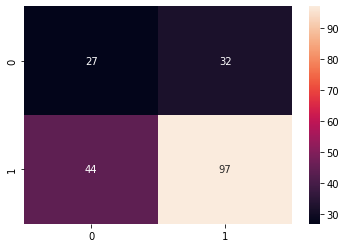

In [30]:
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier()
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))




['good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'go

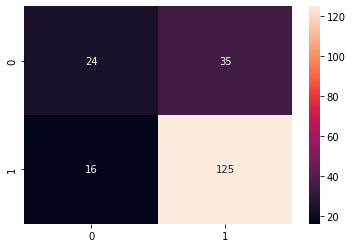

In [31]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(hidden_layer_sizes=(10,10))
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm,annot = True,fmt = '0.5g'))



In [32]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [34]:
df.shape

(5110, 12)

In [35]:
df.dropna(inplace =True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [37]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
categorical = ['gender','ever_married','work_type', 'Residence_type','smoking_status', ]
for x in categorical:
    df[x] = encoder.fit_transform(df[x])
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [39]:
X = df.drop(['id','stroke'],axis = 1)
y = df['stroke']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
strokemodel1 = RandomForestClassifier()
strokemodel1.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred = strokemodel1.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       947
           1       0.00      0.00      0.00        35

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.93      0.96      0.95       982



In [43]:
confusion_matrix(y_test,pred)  

array([[944,   3],
       [ 35,   0]], dtype=int64)